In [1]:
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import tensorflow_addons as tfa

In [2]:
train_dir = "D:/4.2/sc lab/final dataset"

# Image size and batch size
img_height,img_width = 224, 224
img_size = (img_height,img_width)
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  #label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3979 files belonging to 24 classes.


In [3]:
import pandas as pd
dataset_unbatched = tuple(train_ds.unbatch())
labels = []
for (image,label) in dataset_unbatched:
    labels.append(label.numpy())
labels = pd.Series(labels)

# adjustments
count = labels.value_counts().sort_index()
count.index = train_ds.class_names

print(count)

baisakhi            105
basant panchami     173
bihu                134
chhath puja         108
christmas            94
diwali              370
durga puja          402
dusshera            194
eid                 301
ganesh chaturthi    179
holi                286
janmashtami         165
lohri               105
losar                95
mahashivratri       146
onam                145
pohela boishakh     133
pohela falgun        59
pongal               74
ratha yatra         158
shakrain             92
shigmo              188
teej                 96
vesak               177
Name: count, dtype: int64


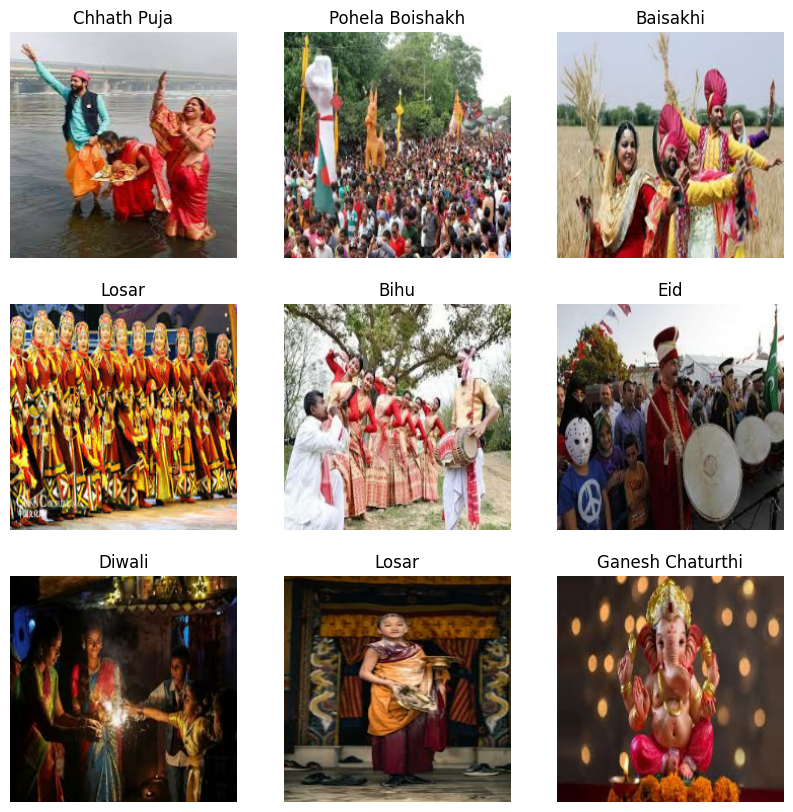

In [4]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    ix = labels[i]
#     for a in labels[i]:
#         if a == 1:
#             break;
#         else:
#             ix+=1
    plt.title(class_names[ix].title())
    plt.axis("off")

In [5]:
img= []
for i in range (24):
    img.append(count[i])
print(img)

[105, 173, 134, 108, 94, 370, 402, 194, 301, 179, 286, 165, 105, 95, 146, 145, 133, 59, 74, 158, 92, 188, 96, 177]


In [6]:
print(class_names)

['baisakhi', 'basant panchami', 'bihu', 'chhath puja', 'christmas', 'diwali', 'durga puja', 'dusshera', 'eid', 'ganesh chaturthi', 'holi', 'janmashtami', 'lohri', 'losar', 'mahashivratri', 'onam', 'pohela boishakh', 'pohela falgun', 'pongal', 'ratha yatra', 'shakrain', 'shigmo', 'teej', 'vesak']


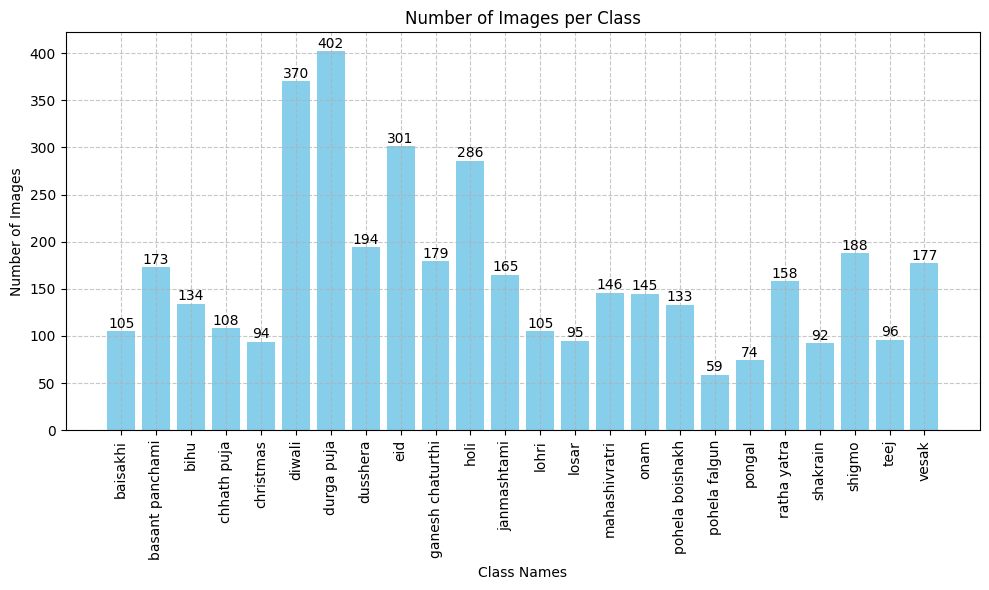

In [7]:
import matplotlib.pyplot as plt

# Sample data
# Create bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
bars = plt.bar(class_names, img, color='skyblue')  # Create the bar chart

for bar, count in zip(bars, img):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(count), ha='center', va='bottom')


plt.xlabel('Class Names')  # Label for x-axis
plt.ylabel('Number of Images')  # Label for y-axis
plt.title('Number of Images per Class')  # Title of the bar chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot
